In [7]:
from orbit.utils.dataset import load_iclaims
from orbit.models.dlt import DLT
from orbit.diagnostics.plot import plot_predicted_data

# log-transformed data
# df = pd.DataFrame({
# 'x': [1,2,3,4,5,6,7,8,9,10],
# 'y': [1,2,3,4,5,6,7,8,9,10],
# })
df = load_iclaims()
df


,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404
...,...,...,...,...,...,...,...
438,2018-05-27,12.220202,0.116342,-0.004795,0.052260,0.452972,-0.175192
439,2018-06-03,12.162763,0.134360,0.014254,0.052260,0.469082,-0.275119
440,2018-06-10,12.288984,0.134360,0.104405,0.063433,0.469308,-0.291676
441,2018-06-17,12.235743,0.097992,0.104405,0.029532,0.460354,-0.152422


2024-03-18 00:46:08 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 8, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


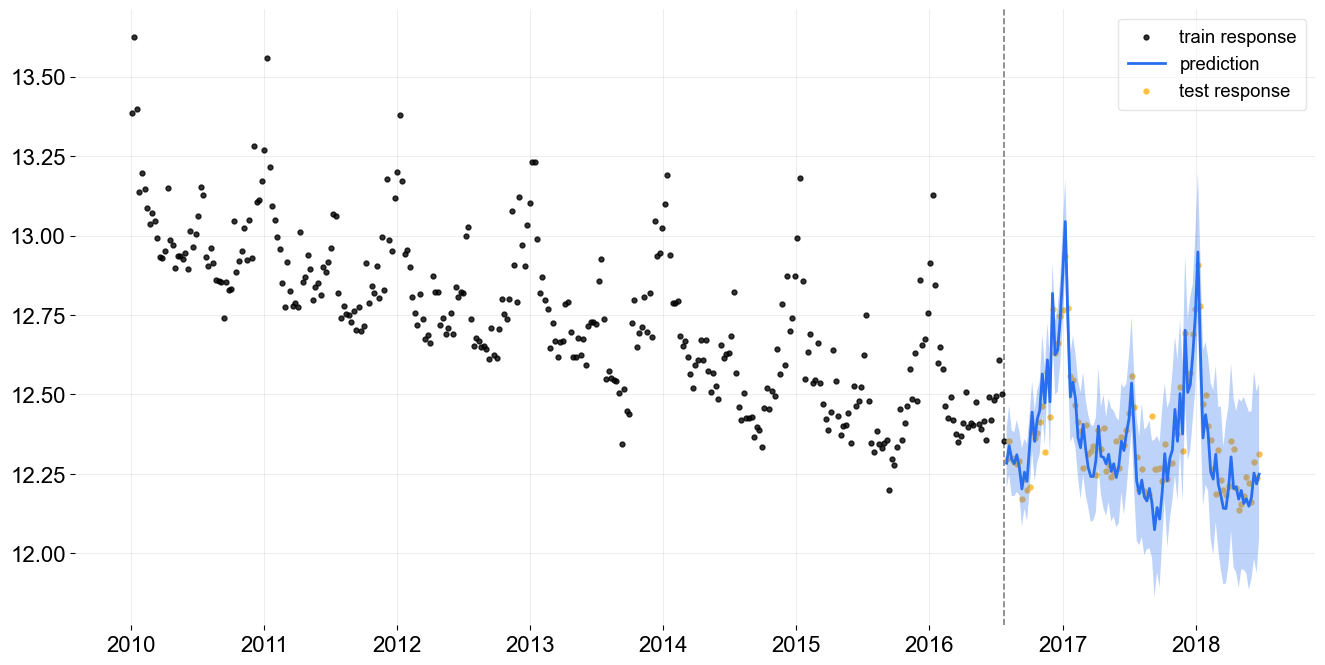

<AxesSubplot: >

In [8]:
date_col = 'week'
response_col = 'claims'
df.dtypes
# train-test split
test_size = 100
train_df = df[:-test_size]
test_df = df[-test_size:]

ets = DLT(
    response_col=response_col,
    date_col=date_col,
    seasonality=52,
    seed=2024,
    estimator="stan-mcmc",
    stan_mcmc_args={'show_progress': False},
)
ets.fit(df=train_df)

predicted_df = ets.predict(df=test_df)

plot_predicted_data(
    training_actual_df=train_df, predicted_df=predicted_df,
    date_col=ets.date_col, actual_col=ets.response_col,
    test_actual_df=test_df
)